#Project Title : Twitter Data Sentiment Analysis

# Introduction
#Python Version Used : Python 3.9.12

##Objective :
### to implement Sentiment Analysis model to categorize a tweet as Positive or Negative.

###It is a NLP Problem where Sentiment Analysis is done by Classifying the Positive tweets from negative tweets by machine learning models for classification, text mining, text analysis, data analysis and data visualization.

###The objective of this project is to predict the polarity of tweets.

###Training sample of tweets and labels, 
###label 0 - tweet is Negative/Racist/Sexist and 
###label 1 - tweet is not Positive/Racist/Sexist.

### Models being Used :
####1. BernoulliNB Model (Bernoulli Naive Bayes)
####2. LinearSVC Model (Linear Support Vector Classifier)
####3. Logistic Regression Model


#List of packages to install while running in Jupyter or Local Environment

#Install packages on Anaconda prompt
##Uncomment and install if not installed

###1. Wordcloud
#conda install -c conda-forge wordcloud

###2. NLTK (3.4.5)
#conda install -c anaconda nltk 

###3. Pickle
#pip install pickle-mixin

###use following command to check if package is installed or not
#conda list

#Dataset : 
##1. Dataset File name is "Twitter_Dataset_1.6Million.csv"
##2. Dataset contains 1,600,000(1.6 Million) tweets. 
##3. File size is : 227MB
##4. The tweets have been annotated (0 = Negative, 4 = Positive) and they can be used to detect sentiment.
##5. It contains the following 6 fields:
###5.1. sentiment: the polarity of the tweet (0 = negative, 4 = positive)
###5.2. ids      : The id of the tweet (1960185684)
###5.3. date     : the date of the tweet (Fri May 29 07:33:38 PDT 2009)
###5.4. flag     : The query (NO_QUERY). If there is no query, then this value is NO_QUERY.
###5.5. user     : the user that tweeted (Oliviaaemily)
###5.6. text     : the text of the tweet (Just sitting in the garden leting the sun do its job )

##6. Dataset if collected from Kaggle.com

#Dataset Local Environment issue
##Limititaion while opening file in MS-Excel
###Dataset is having 1,600,000(1.6Million Rows)
###Excel cannot exceed the limit of 1,048,576 rows and 16,384 columns.
##File will open but it will show only 1,048,567 rows.

###Solution : 
The file contains more than 1,048,576 rows or 16,384 columns. 
To fix this problem, open the source file in a text editor such as Microsoft Word. 
Save the source file as several smaller files that conform to this row and column limit, 
and then open the smaller files in Microsoft Excel. 
If the source data cannot be opened in a text editor, try importing the data into Microsoft Access, and then exporting subsets of the data from Access to Excel.

We can perform EDA on 1,048,576 rows so Solution step is skipped as for now.

In [1]:
# Importing Packages and Utilities
# utilities
import re
import pickle
import numpy as np
import pandas as pd

#Calculating Time for methods and model
import time

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from plotly import graph_objs as go

# nltk
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


#Dataset Importing

In [2]:
#For Colab and Google Drive
#Importing Dataset from Google drive
#Google Drive connect in colab
#Uncomment while using in colab

from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

# # Importing the dataset
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"

dataset = pd.read_csv('/content/gdrive/MyDrive/Final-Project-DBDA/Twitter_Dataset_1.6Million.csv', 
                      encoding=DATASET_ENCODING , names=DATASET_COLUMNS)


Mounted at /content/gdrive/


In [ ]:
#While using in Jupyter
#Comment while using in colab
# DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
# DATASET_ENCODING = "ISO-8859-1"
# dataset = pd.read_csv('C:\\Users\\edita\\Jupyter-Notebooks\\FinalProject\\Twitter_Dataset_1.6Million.csv',
#                      encoding=DATASET_ENCODING , names=DATASET_COLUMNS)

#Basic Dataset Validation

In [6]:
dataset.columns
dataset.dtypes

sentiment     int64
ids           int64
date         object
flag         object
user         object
text         object
dtype: object

In [7]:
dataset.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
dataset.tail()

,sentiment,ids,date,flag,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [9]:
dataset.shape
#(1600000, 6) Dataset is of 1600000 i.e. 1.6 million rows and 6 columns

(1600000, 6)

In [ ]:
#dataset.describe()

#Distribution of Tweets in Dataset

In [10]:
tweets_distribution = dataset.groupby('sentiment').count()['text'].reset_index().sort_values(by='text')
tweets_distribution.style.background_gradient(cmap='Purples')

,sentiment,text
0,0,800000
1,4,800000


#Plotting the distribution for dataset.

[Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

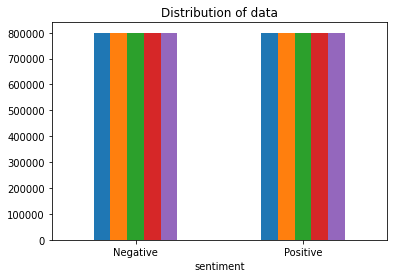

In [12]:
# Plotting the distribution for dataset.
ax = dataset.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

#As we can see from plot our dataset is balanced.
##i.e. we have 
##  8,00,000 Tweets of Negative and
##  8,00,000 Tweets of Positive sentiments.

# adding a column to represent the length of the tweet

---


#### Column 'length' is being used for EDA which will be removed later
#### as it does not serve any purpose in sentiment analysis.

In [13]:
dataset['length'] = dataset['text'].str.len()

dataset.head(3)

,sentiment,ids,date,flag,user,text,length
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89


#Showing Variation of Length of Tweets

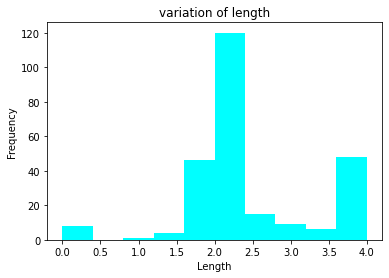

In [14]:
dataset.groupby('length').mean()['sentiment'].plot.hist(color = 'cyan', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

#Data Cleaning
## Removing Columns
###Here we are removing 5 columns from dataset namely id, date, flag, user, and length (which was added to determine length of tweet text). We are removing this columns as these column values will not add any importance in sentiment analysis for that we will be needing only Two columns namely “sentiment”, “text”.

In [15]:
# Removing the unnecessary columns.("ids", "date", "flag", "user", "length")
dataset = dataset[['sentiment','text']]

#dataset.head
dataset.tail()

,sentiment,text
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,happy #charitytuesday @theNSPCC @SparksCharity...


In [16]:
#Checking for NULL Values/Entries
dataset.isnull().any()

sentiment    False
text         False
dtype: bool

#Replacing Values
##The tweets have been annotated (0 = Negative, 4 = Positive) and they can be used to detect sentiment.
###Changing Sentiment value of Positive to 1 from 4 for sake of simplicity.

In [17]:
dataset['sentiment'] = dataset['sentiment'].replace(4,1)

dataset.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


##Storing data in lists.
###list 'text' will Hold Tweets
###list 'sentiment' will hold Sentiments (0/1)

In [18]:
# Storing data in lists.
text, sentiment = list(dataset['text']), list(dataset['sentiment'])

#Preprocessing data stored in list 'text'

##The Preprocessing steps taken are:
###1. Lower Casing: Each text is converted to lowercase.

###2. Replacing URLs: Links starting with "http" or "https" or "www" are replaced by "URL".

###3. Replacing Emojis: Replace emojis by using a pre-defined dictionary containing emojis 
### along with their meaning. (eg: ":)" to "EMOJIsmile")

###4. Replacing Usernames: Replace @Usernames with word "USER". (eg: "@Kaggle" to "USER")

###5. Removing Non-Alphabets: Replacing characters except Digits and Alphabets with a space.

###6. Removing Consecutive letters: 3 or more consecutive letters are replaced by 2 letters. (eg: "Tooooo" to "Too")

###7. Removing Short Words: Words with length less than 2 are removed.

###8. Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. 
### They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")

###9. Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “Great” to “Good”)

In [19]:
##Defining emojis
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}


##Getting Stopwords
stopwordlist = sorted(list(stopwords.words('english')))

In [ ]:
#print(stopwordlist)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

#Defining method preprocess() for Preprocessing of Data

In [20]:
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)

        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [21]:
#Preprocessing and Calculating Time for Preprocessing

t = time.time()
processedtext = preprocess(text)
print(f'Text Preprocessing complete.')
length = len(processedtext)
print(f'No of Tweets processed : ', length)
print(f'Time Taken: {round(time.time()-t)} seconds')

##Taking Approximately 230-250 seconds to process 1.6 Mililion tweets
##On Windows 10 with 8GB RAM and i5(Dual Core2.40)

Text Preprocessing complete.
No of Tweets processed :  1600000
Time Taken: 130 seconds


##Data Preprocessing overview
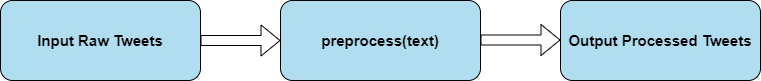

#Analysing the data
##To analyzed processed data we will find Top 30 Frequently used words as well as WordCloud for Positive and Negative tweets from Dataset.

##Most Frequently occurred words top 30

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

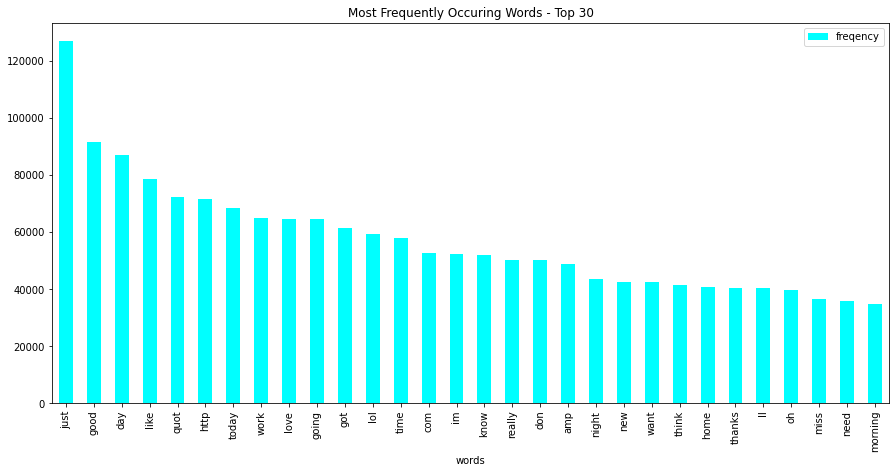

In [24]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(dataset.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['words', 'freqency'])

frequency.head(30).plot(x='words', y='freqency', kind='bar', figsize=(15, 7), color = 'cyan')
plt.title("Most Frequently Occuring Words - Top 30")

### Word-Cloud for Positive words.

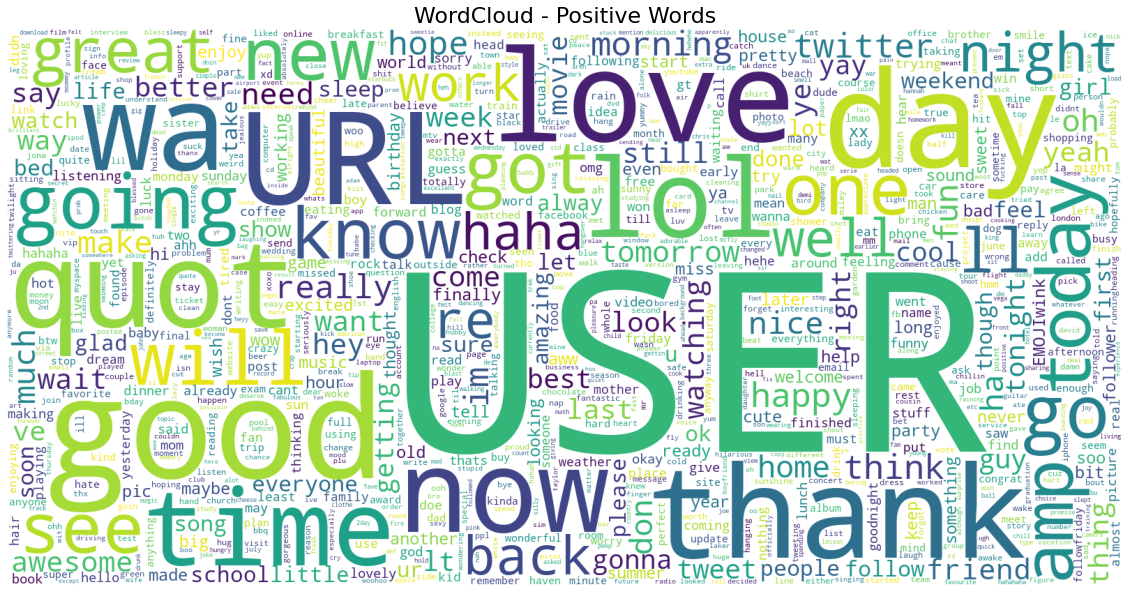

In [23]:
### Word-Cloud for Positive tweets.
data_pos = processedtext[800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,background_color='white',
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)
plt.title("WordCloud - Positive Words", fontsize = 22)
plt.axis('off')
plt.show()

### Word-Cloud for Negative words.


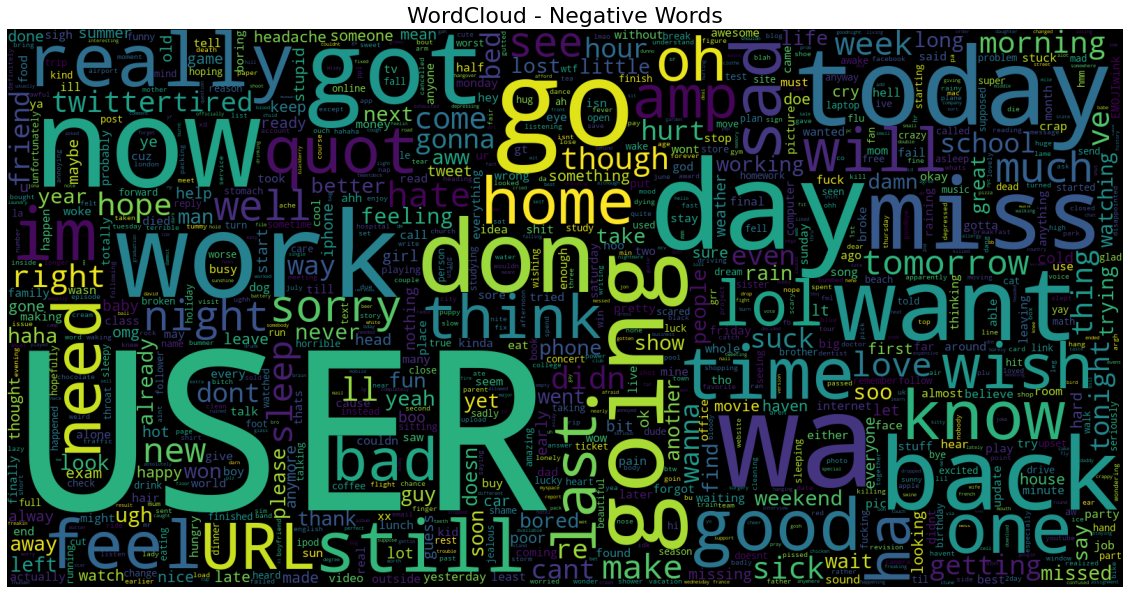

In [25]:
### Word-Cloud for Negative tweets.
data_neg = processedtext[:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.title("WordCloud - Negative Words", fontsize = 22)
plt.axis('off')
plt.show()

#Splitting the Data
##Here, we will divide Preprocessed Data into 2 sets :
##Training Data: The dataset upon which the model would be trained on. Contains 80% data.
##Test Data: The dataset upon which the model would be tested against. Contains 20% data.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment,
                                                    test_size = 0.20, random_state = 0)
print(f'Data Split In Train and Test is done.')

Data Split In Train and Test is done.


#TF-IDF Vectoriser
##TF-IDF indicates what the importance of the word is in order to understand the document or dataset.

##TF-IDF Vectoriser : converts a collection of raw documents to a matrix of TF-IDF features.
##The Vectoriser is usually trained on only the X_train dataset. 

##ngram_range : is the range of number of words in a sequence. 
## e.g "very expensive" is a 2-gram that is considered as an extra feature separately from "very" and "expensive" when you have a n-gram range of (1,2)

##max_features : specifies the number of features to consider. [Ordered by feature frequency across the corpus].

In [27]:
t = time.time()

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

print(f'Time Taken: {round(time.time()-t)} seconds')

Vectoriser fitted.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  500000
Time Taken: 59 seconds


#Tranforming the dataset
## Here we Transform the X_train and X_test dataset into matrix of TF-IDF Features by using the
## TF-IDF Vectoriser. 
## This datasets will be used to train the model and test against it.

In [28]:
t = time.time()

X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'X_train and X_test is Data Transformed.')

print(f'Time Taken: {round(time.time()-t)} seconds')

X_train and X_test is Data Transformed.
Time Taken: 54 seconds


#Creating and Evaluating Models
## We're creating 3 different types of model for our sentiment analysis problem: 
### 1. Bernoulli Naive Bayes (BernoulliNB) Model
### 2. Linear Support Vector Classification (LinearSVC) Model
### 3. Logistic Regression (LR) Model

#Defining method model_Evaluate() to evaluate model

In [29]:
#Defining method model_Evaluate() to evaluate model
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

#Evaluating Models with method model_Evaluate(model)

##BernoulliNB Model

              precision    recall  f1-score   support

           0       0.81      0.79      0.80    159815
           1       0.80      0.81      0.80    160185

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000

Time Taken: 2 seconds


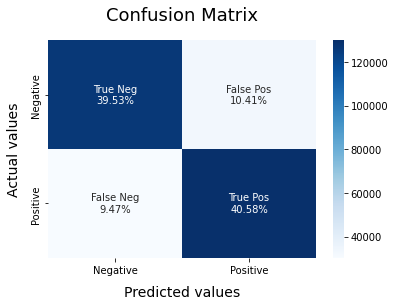

In [30]:
##BernoulliNB Model
t = time.time()

BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

print(f'Time Taken: {round(time.time()-t)} seconds')

##LinearSVC (Linear Support Vector Classification) Model


              precision    recall  f1-score   support

           0       0.82      0.81      0.81    159815
           1       0.81      0.82      0.82    160185

    accuracy                           0.82    320000
   macro avg       0.82      0.82      0.82    320000
weighted avg       0.82      0.82      0.82    320000

Time Taken: 39 seconds


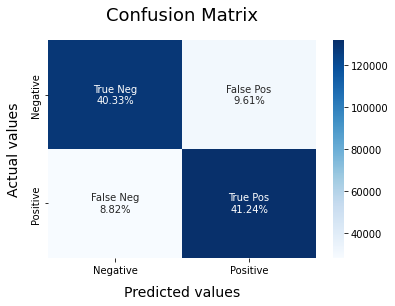

In [31]:
##LinearSVC (Linear Support Vector Classification) Model
t = time.time()

SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

print(f'Time Taken: {round(time.time()-t)} seconds')

##Logistic Regression Model

              precision    recall  f1-score   support

           0       0.83      0.82      0.82    159815
           1       0.82      0.84      0.83    160185

    accuracy                           0.83    320000
   macro avg       0.83      0.83      0.83    320000
weighted avg       0.83      0.83      0.83    320000

Time Taken: 268 seconds


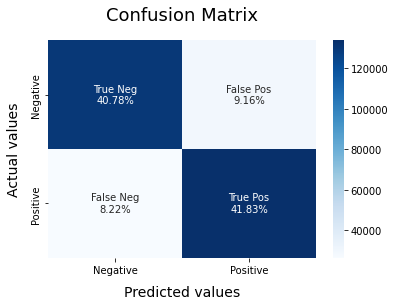

In [32]:
##Logistic Regression Model
t = time.time()

LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

print(f'Time Taken: {round(time.time()-t)} seconds')

#Observations :
## After running 3 models on Dataset we can say :
##1. Accuracy Achieved by Logistic Regression Model is nearly 83%.
##2. Accuracy Achieved by Linear Support Vector Classification is 82%.
##3. Accuracy achieved by BernoulliNB Model is 80% while classifying.
##4. Performance of Logistic Regression Model is top than rest 2 models.
##5. BernoulliNB Model is fastest to Train and Predict.


#Saving the Models
##Using PICKLE we will save following:
###1. Vectoriser,
###2. BernoulliNB, 
###3. LinearSVC Model and
###4. Logistic Regression Model for later use.

##Environment Dependent Path Variables
###Uncomment Path Variables acording to environment
###Path variables for Local environment while using Jupyter to save Pickle Files

###Path variables for Google Drive to save Pickle Files

In [33]:
path_colab = '/content/gdrive/MyDrive/Final-Project-DBDA/'

path_local = 'C:\\Users\\edita\\Jupyter-Notebooks\\FinalProject\\'

In [34]:
###1. Saving Vectoriser
#For Jupyter
#file = open(path_local + 'vectoriser-ngram-(1,2).pickle','wb')
#For Colab
file = open(path_colab + 'vectoriser-ngram-(1,2).pickle','wb')

pickle.dump(vectoriser, file)
file.close()

In [35]:
###2. Saving BernoulliNB
#For Jupyter
#file = open(path_local + 'Sentiment-BNB.pickle','wb')
#For Colab
file = open(path_colab + 'Sentiment-BNB.pickle','wb')

pickle.dump(BNBmodel, file)
file.close()

In [36]:
###3. Saving LinearSVC Model
#For Jupyter
#file = open(path_local + 'Sentiment-SVC.pickle','wb')
#For Colab
file = open(path_colab + 'Sentiment-SVC.pickle','wb')

pickle.dump(SVCmodel, file)
file.close()

In [37]:
###4. Saving Logistic Regression Model
#For Jupyter
#file = open(path_local + 'Sentiment-LR.pickle','wb')
#For Colab
file = open(path_colab + 'Sentiment-LR.pickle','wb')

pickle.dump(LRmodel, file)
file.close()

#Defining preprocess_simple() Preprocessing method for simple preprocessing

In [38]:
#Defining preprocess_simple() Preprocessing method for simple preprocessing
def preprocess_simple(textdata):
    processedText = []
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        #Converting tweet to lowercase
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)

        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

#Using the Model

##Using LR Model

In [39]:
#Using LR Model

def load_models():
    # Load the vectoriser.
    #Colab Path
    #file = open('/content/vectoriser-ngram-(1,2).pickle', 'rb')
    file = open('/content/vectoriser-ngram-(1,2).pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()

    # Load the LR Model.
    file = open('/content/Sentiment-LRv1.pickle', 'rb')
    LRmodel = pickle.load(file)
    file.close()
    
    return vectoriser, LRmodel

def predict(vectoriser, model, text):
    # Predict the sentiment
    textdata = vectoriser.transform(preprocess(text))
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

if __name__=="__main__":
    # Loading the models.
    # vectoriser, LRmodel = load_models()
    text = ["Just going to cry myself to sleep after watching Marley and Me",
            "I hate when I have to call and wake people up ",
            "@julieebaby awe i love you too!!!! 1 am here  i miss you😢",
            "@cheechbud i think ur right!! hahaha!! 4.5 hrs now!! ",
            "@volvomumbai kudos for keeping best of best service😊😊",
            "Enjoying top delicious Misal-pav @NewaleMisal😘😊😘 #HappyMe"]
    
    #Code to add preprocessing to the text before passing to model
    processedtext = preprocess_simple(text)       
    df = predict(vectoriser, LRmodel, processedtext)

print('After preprocessing and using Logistic Regression Model Sentiment analysis : ')    
df.head(6)

After preprocessing and using Logistic Regression Model Sentiment analysis : 


,text,sentiment
0,just going to cry myself to sleep after watchi...,Negative
1,i hate when i have to call and wake people up,Negative
2,USER awe i love you too 1 am here i miss you,Negative
3,USER i think ur right hahaha 4 5 hrs now,Positive
4,USER kudos for keeping best of best service,Positive
5,enjoying top delicious misal pav USER happyme,Positive


#Using BNB Model

In [40]:
#Using BNB Model

def load_models():
    
    # Load the vectoriser.
    #Colab Path
    #file = open('/content/vectoriser-ngram-(1,2).pickle', 'rb')
    file = open('/content/vectoriser-ngram-(1,2).pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    
    # Load the BNB Model.
    file = open('/content/Sentiment-BNB.pickle', 'rb')
    BNBmodel = pickle.load(file)
    file.close()
    
    return vectoriser, BNBmodel

def predict(vectoriser, model, text):
    # Predict the sentiment
    textdata = vectoriser.transform(preprocess(text))
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

if __name__=="__main__":
    # Loading the models.
    # vectoriser, BNBmodel = load_models()
    text = ["Just going to cry myself to sleep after watching Marley and Me",
            "I hate when I have to call and wake people up ",
            "@julieebaby awe i love you too!!!! 1 am here  i miss you😢",
            "@cheechbud i think ur right!! hahaha!! 4.5 hrs now!! ",
            "@volvomumbai kudos for keeping best of best service😊😊",
            "Enjoying one of the delicious Misal-pav @NewaleMisal😘😊😘 #HappyMe"]
    
    #Code to add preprocessing to the text before passing to model
    processedtext = preprocess_simple(text)   
    df = predict(vectoriser, BNBmodel, processedtext)

print('After preprocessing and using BNB Model Sentiment analysis : ')
df.head(6)

After preprocessing and using BNB Model Sentiment analysis : 


,text,sentiment
0,just going to cry myself to sleep after watchi...,Negative
1,i hate when i have to call and wake people up,Negative
2,USER awe i love you too 1 am here i miss you,Negative
3,USER i think ur right hahaha 4 5 hrs now,Positive
4,USER kudos for keeping best of best service,Positive
5,enjoying one of the delicious misal pav USER h...,Positive


##Using SVC Model

In [41]:
#Using SVC Model

def load_models():
        
    # Load the vectoriser.
    #Colab Path
    #file = open('/content/vectoriser-ngram-(1,2).pickle', 'rb')
    file = open('/content/vectoriser-ngram-(1,2).pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    
    # Load the LR Model.
    file = open('/content/Sentiment-SVC.pickle', 'rb')
    SVCmodel = pickle.load(file)
    file.close()
    
    return vectoriser, SVCmodel

def predict(vectoriser, model, text):
    # Predict the sentiment
    textdata = vectoriser.transform(preprocess(text))
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

if __name__=="__main__":
    # Loading the models.
    # vectoriser, SVCmodel = load_models()
    text = ["Just going to cry myself to sleep after watching Marley and Me",
            "I hate when I have to call and wake people up ",
            "@julieebaby awe i love you too!!!! 1 am here  i miss you😢",
            "@cheechbud i think ur right!! hahaha!! 4.5 hrs now!! ",
            "@volvomumbai kudos for keeping best of best service😊😊",
            "Enjoying best delicious Misal-pav @NewaleMisal😘😊😘 #HappyMe"]
    
    #Code to add preprocessing to the text before passing to model
    processedtext = preprocess_simple(text)
    df = predict(vectoriser, SVCmodel, processedtext)

    print('After preprocessing and using SVC Model Sentiment analysis : ')
df

After preprocessing and using SVC Model Sentiment analysis : 


,text,sentiment
0,just going to cry myself to sleep after watchi...,Negative
1,i hate when i have to call and wake people up,Negative
2,USER awe i love you too 1 am here i miss you,Negative
3,USER i think ur right hahaha 4 5 hrs now,Positive
4,USER kudos for keeping best of best service,Positive
5,enjoying best delicious misal pav USER happyme,Positive


#Demo Using Logistic Regression Model
### As this model gave highest Accuracy i.e. 83%.

In [42]:
#Using LR Model

def load_models():
    # Load the vectoriser.
    #Colab Path
    #file = open('/content/vectoriser-ngram-(1,2).pickle', 'rb')
    file = open('/content/vectoriser-ngram-(1,2).pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()

    # Load the LR Model.
    file = open('/content/Sentiment-LRv1.pickle', 'rb')
    LRmodel = pickle.load(file)
    file.close()
    
    return vectoriser, LRmodel

def predict(vectoriser, model, text):
    # Predict the sentiment
    textdata = vectoriser.transform(preprocess(text))
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

if __name__=="__main__":
    # Loading the models.
    # vectoriser, LRmodel = load_models()
    #Code to add preprocessing to the text before passing to model
    #Tweets with unprocessed data(noise)
    print('Sentiment Analysis with unprocessed Tweets(noise) : ')
    text = ["Just going to cry myself to sleep after watching Marley and Me",
            "I hate when I have to call and wake people up ",
            "@julieebaby awe i love you too!!!! 1 am here  i miss you😢",
            "@cheechbud i think ur right!! hahaha!! 4.5 hrs now!! ",
            "@volvomumbai kudos for keeping best of best service😊😊",
            "Enjoying one of the delicious Misal-pav @NewaleMisal😘😊😘 #HappyMe"]
    processedtext = preprocess_simple(text)
    df = predict(vectoriser, LRmodel, processedtext)
    print('After preprocessing and using Logistic Regression Model Sentiment analysis : ')    
    print(df.head(6))
    print('-------------------------------------------------------------\n\n\n')

    #Tweets with unprocessed plain text
    print('Sentiment Analysis with plain text Tweets : ')
    text = ["Positivity attracts Positivity",
            "Twitter is boring now a days",
            "Numbness In My Eyes and rage in my heart",
            "Bush was racist towards gulf people",
            "I've become so happy",
            "happiness is treated good by cabin crew"]
    processedtext = preprocess_simple(text)       
    df = predict(vectoriser, LRmodel, processedtext)
    print('After preprocessing and using Logistic Regression Model Sentiment analysis : ')    
    print(df.head(6))
    print('-------------------------------------------------------------\n\n\n')

    #Tweets from user Input
    print('Sentiment Analysis with Tweets from user Input : ')
    input_tweets = input("Enter Tweets separated by #< ")
    text  = input_tweets.split("#<")
    print('Entered Tweet is : ', text)
    
    processedtext = preprocess_simple(text)       
    df = predict(vectoriser, LRmodel, processedtext)
    print('After preprocessing and using Logistic Regression Model Sentiment analysis : ')    
df.head(6)
    

Sentiment Analysis with unprocessed Tweets(noise) : 
After preprocessing and using Logistic Regression Model Sentiment analysis : 
                                                text sentiment
0  just going to cry myself to sleep after watchi...  Negative
1     i hate when i have to call and wake people up   Negative
2      USER awe i love you too 1 am here i miss you   Negative
3          USER i think ur right hahaha 4 5 hrs now   Positive
4       USER kudos for keeping best of best service   Positive
5  enjoying one of the delicious misal pav USER h...  Positive
-------------------------------------------------------------



Sentiment Analysis with plain text Tweets : 
After preprocessing and using Logistic Regression Model Sentiment analysis : 
                                        text sentiment
0            positivity attracts positivity   Positive
1              twitter is boring now a days   Negative
2  numbness in my eyes and rage in my heart   Negative
3       bush was rac

,text,sentiment
0,USER aarya what a pleasant morning,Positive


In [ ]:
'''
Test Tweets :
@KingKaka : Aarya What a pleasant Morning 😊😊
@KingKaka : Samarth I am feeling sick today😢

@KingKaka says Aarya will complete her homework😊😊
@KingKaka says Samarth will fall sick today😢
'''

#Demo Using Logistic Regression Model
##As this model gave highest Accuracy i.e. 83%

In [43]:
def lrmodel_demo(text):
  t = time.time()
  #Method to for demo of Logistic Regression Model
  #Load Models
  file = open('/content/gdrive/MyDrive/Final-Project-DBDA/vectoriser-ngram-(1,2).pickle', 'rb')
  vectoriser = pickle.load(file)
  file.close()

  # Load the LR Model.
  file = open('/content/gdrive/MyDrive/Final-Project-DBDA/Sentiment-LR.pickle', 'rb')
  LRmodel = pickle.load(file)
  file.close()

  # Predict the sentiment
  textdata = vectoriser.transform(preprocess(text))
  sentiment = LRmodel.predict(textdata)
  #Code to add preprocessing to the text before passing it to dataframe
  processedtext = preprocess_simple(text)

  # Make a list of text with sentiment.
  data = []
  for text, pred in zip(processedtext, sentiment):
    data.append((text,pred))
        
  # Convert the list into a Pandas DataFrame.
  df = pd.DataFrame(data, columns = ['text','sentiment'])
  df = df.replace([0,1], ["Negative","Positive"])
  print(f'\n\n Time Taken to predict : {round(time.time()-t)} seconds')
  return df

#Actual Demo

In [44]:
#Demo 1
#With unprocessed Raw Tweets
print('Sentiment Analysis with unprocessed Tweets(noise) : ')
tweets = ["Just going to cry myself to sleep after watching Marley and Me",
        "I hate when I have to call and wake people up ",
        "@julieebaby awe i love you too!!!! 1 am here  i miss you😢",
        "@cheechbud i think ur right!! hahaha!! 4.5 hrs now!! ",
        "@volvomumbai kudos for keeping best of best service😊😊",
        "Enjoying top delicious Misal-pav @NewaleMisal😘😊😘 #HappyMe"]

#calling function lrmodel_demo()
dframe = lrmodel_demo(tweets)
dframe

Sentiment Analysis with unprocessed Tweets(noise) : 


 Time Taken to predict : 2 seconds


,text,sentiment
0,just going to cry myself to sleep after watchi...,Negative
1,i hate when i have to call and wake people up,Negative
2,USER awe i love you too 1 am here i miss you,Negative
3,USER i think ur right hahaha 4 5 hrs now,Positive
4,USER kudos for keeping best of best service,Positive
5,enjoying top delicious misal pav USER happyme,Positive


In [45]:
#Demo 2 : #Tweets with unprocessed plain text
print('Sentiment Analysis with plain text Tweets : ')
plain_text = ["Positivity attracts Positivity",
            "Twitter is boring now a days",
            "Numbness In My Eyes and rage in my heart",
            "Bush was racist towards gulf people",
            "I've become so happy",
            "happiness is treated good by cabin crew"]
#calling function lrmodel_demo()
dframe = lrmodel_demo(tweets)
dframe

Sentiment Analysis with plain text Tweets : 


 Time Taken to predict : 3 seconds


,text,sentiment
0,just going to cry myself to sleep after watchi...,Negative
1,i hate when i have to call and wake people up,Negative
2,USER awe i love you too 1 am here i miss you,Negative
3,USER i think ur right hahaha 4 5 hrs now,Positive
4,USER kudos for keeping best of best service,Positive
5,enjoying top delicious misal pav USER happyme,Positive


In [46]:
#Demo 3 : 
#Tweets from user Input
print('Sentiment Analysis with Tweets from user Input : ')
input_tweets = input("Enter Tweets separated by #< ")
text_input  = input_tweets.split("#<")
print('Entered Tweet/Tweets : ')
for tweet in text_input:
  print(tweet)
#calling function lrmodel_demo()
dframe = lrmodel_demo(text_input)
dframe

'''
Test Tweets :
@KingKaka : Aarya What a pleasant Morning 😊😊
@KingKaka : Samarth I am feeling sick today😢

@KingKaka says Aarya will complete her homework😊😊
@KingKaka says Samarth will fall sick today😢
'''

Sentiment Analysis with Tweets from user Input : 
Enter Tweets separated by #< @KingKaka : Aarya What a pleasant Morning 😊😊 #<@KingKaka : Samarth I am feeling sick today😢
Entered Tweet/Tweets : 
@KingKaka : Aarya What a pleasant Morning 😊😊 
@KingKaka : Samarth I am feeling sick today😢


 Time Taken to predict : 1 seconds


,text,sentiment
0,USER aarya what a pleasant morning,Positive
1,USER samarth i am feeling sick today,Negative


#Demo Architecture

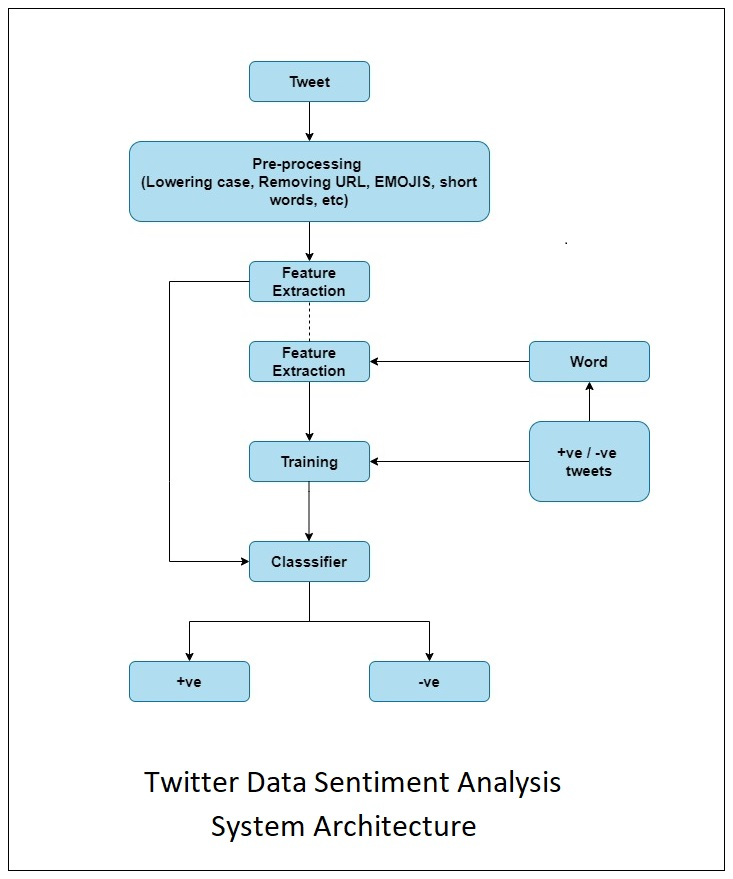